In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/MyData/databt/data_o.csv")
artist_data = pd.read_csv('/content/drive/MyDrive/MyData/databt/data_by_artist_o.csv')
genre_data = pd.read_csv('/content/drive/MyDrive/MyData/databt/data_by_genres_o.csv')
year_data = pd.read_csv('/content/drive/MyDrive/MyData/databt/data_by_year_o.csv')

In [ ]:
!pip install yellowbrick

In [4]:
#remove data
genre_data=genre_data.drop(401, axis=0)
data=data.drop([107341, 138618, 168377], axis=0)

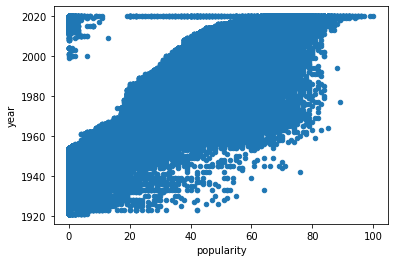

In [6]:
# plt.scatter(data['popularity'], data['year'])
data.plot.scatter(x='popularity', y='year')

In [ ]:
K=range(2,20)
X = genre_data.select_dtypes(np.number)
models=[KMeans(n_clusters=k, n_jobs=-1).fit(X) for k in K]
error=[model.inertia_ for model in models]
accur=[model.score(X) for model in models]


In [ ]:
elbowData=pd.DataFrame(data={'error':error,'accur':accur})
# elbowData.to_csv('elbowYearData.csv',sep=',')
# elbowData=pd.read_csv('/content/elbowYearData.csv')
# elbowData=error

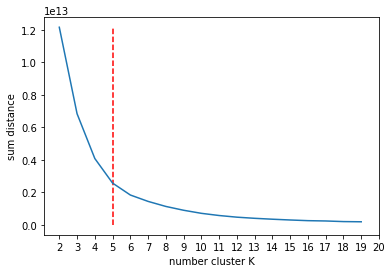

In [ ]:
plt.plot(range(2,20),elbowData['error'])
plt.vlines(x=5, ymin=0,ymax=elbowData['error'].iloc[0], colors='r', ls='--',label='seven')
plt.xticks(np.arange(2, 21, step=1))
plt.xlabel('number cluster K')
plt.ylabel('sum distance')
plt.savefig('distYearData.png')

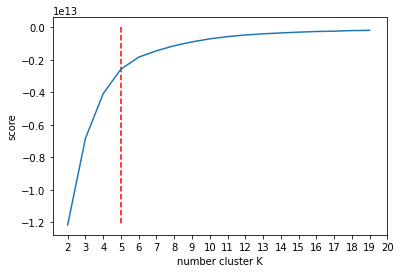

In [ ]:
plt.plot(range(2,20),elbowData['accur'])
plt.vlines(x=5, ymin=0,ymax=elbowData['accur'].iloc[0], colors='r', ls='--',label='seven')
plt.xticks(np.arange(2, 21, step=1))
plt.xlabel('number cluster K')
plt.ylabel('score')
plt.savefig('scoreYearData.png')

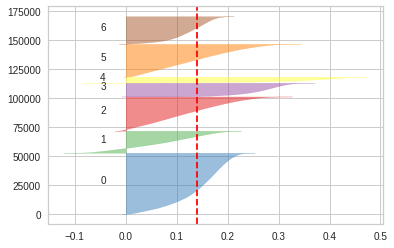

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# from yellowbrick.datasets import load_nfl

k=7
model = KMeans(k, random_state=42, n_jobs=4)
visualizer = Pipeline([('scaler', StandardScaler()), 
                        ('plot', SilhouetteVisualizer(model, colors='yellowbrick'))])
X = data.select_dtypes(np.number)
visualizer.fit(X)
plt.savefig(str(k)+'silhouetteYearData.png')

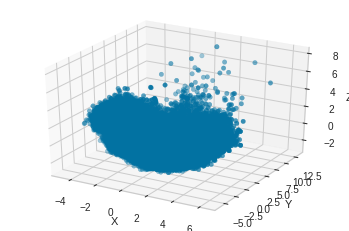

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
k=7
inpData=data
# cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=k, n_jobs=-1))])
# X = inpData.select_dtypes(np.number)
# cluster_pipeline.fit(X)
# Xt=cluster_pipeline.transform(X)
# cluster_centers=cluster_pipeline.named_steps['kmeans'].cluster_centers_
# inpData['cluster'] = cluster_pipeline.predict(X)
from sklearn.decomposition import PCA
X_ = inpData.select_dtypes(np.number)
plot3d = Pipeline([('scaler', StandardScaler()), 
                        ('3d', PCA(n_components=3))])
X_ = inpData.select_dtypes(np.number)
plot3d.fit(X_)
X3d=plot3d.transform(X_)
# pca_ = PCA(n_components=3)
# pca_.fit(cluster_centers)
# C3d=pca_.transform(cluster_centers)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2])
# ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=inpData['cluster'], cmap='viridis')
# ax.scatter(C3d[:,0], C3d[:,1], C3d[:,2],  c='r', marker='+', s=200, alpha=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("cluster"+str(k)+"YearData.png")

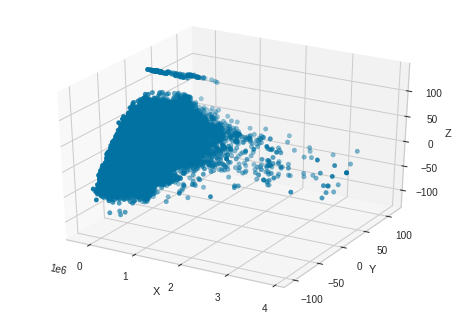

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_ = data.select_dtypes(np.number)
pca.fit(X_)
X3d=pca.transform(X_)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("Data.png")

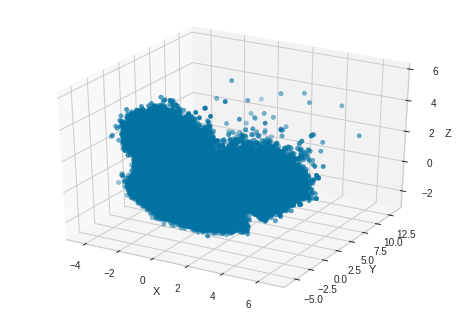

In [ ]:
from sklearn.decomposition import PCA
plot3d = Pipeline([('scaler', StandardScaler()), 
                        ('3d', PCA(n_components=3))])
X_ = data.select_dtypes(np.number)
plot3d.fit(X_)
X3d=plot3d.transform(X_)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("scalerData.png")

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............ (step 2 of 2) Processing kmeans, total=  17.3s


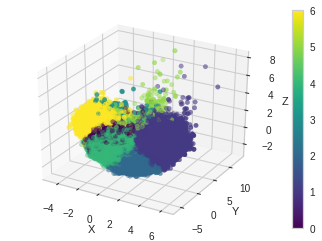

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
k=7
inpData=data
cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                            ('kmeans', KMeans(n_clusters=k, verbose=2, n_jobs=4))],
                            verbose=True)
X = inpData.select_dtypes(np.number)
cluster_pipeline.fit(X)
cluster_centers=cluster_pipeline.named_steps['kmeans'].cluster_centers_
label = cluster_pipeline.predict(X)
from sklearn.decomposition import PCA
plot3d = Pipeline([('scaler', StandardScaler()), 
                        ('3d', PCA(n_components=3))])
plot3d.fit(X)
X3d=plot3d.transform(X)
pca_ = PCA(n_components=3)
pca_.fit(cluster_centers)
C3d=pca_.transform(cluster_centers)
ax = plt.axes(projection='3d')
p=ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=label, cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.colorbar(p,ax=ax)
plt.savefig("cluster"+str(k)+"Data.png")

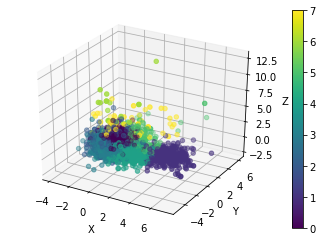

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
k=8
inpData=genre_data
cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                             ('kmeans', KMeans(n_clusters=k, n_jobs=-1))])
X = inpData.select_dtypes(np.number)
cluster_pipeline.fit(X)
cluster_centers=cluster_pipeline.named_steps['kmeans'].cluster_centers_
label = cluster_pipeline.predict(X)
from sklearn.decomposition import PCA
plot3d = Pipeline([('scaler', StandardScaler()), 
                    ('3d', PCA(n_components=3))])
plot3d.fit(X)
X3d=plot3d.transform(X)
pca_ = PCA(n_components=3)
pca_.fit(cluster_centers)
C3d=pca_.transform(cluster_centers)
ax = plt.axes(projection='3d')
p=ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=label, cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.colorbar(p,ax=ax)
plt.savefig("cluster"+str(k)+"GenreData.png")

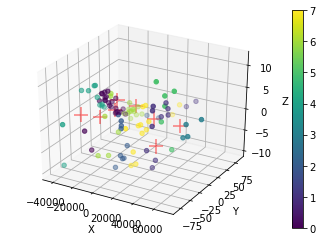

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
k=8
inpData=year_data
cluster_pipeline = Pipeline([('kmeans', KMeans(n_clusters=k, n_jobs=-1))])
X = inpData.select_dtypes(np.number)
cluster_pipeline.fit(X)
cluster_centers=cluster_pipeline.named_steps['kmeans'].cluster_centers_
label = cluster_pipeline.predict(X)
from sklearn.decomposition import PCA
plot3d = Pipeline([('3d', PCA(n_components=3))])
plot3d.fit(X)
X3d=plot3d.transform(X)
pca_ = PCA(n_components=3)
pca_.fit(cluster_centers)
C3d=pca_.transform(cluster_centers)
ax = plt.axes(projection='3d')
p=ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=label, cmap='viridis')
ax.scatter(C3d[:,0], C3d[:,1], C3d[:,2], s=200, marker='+', alpha=0.5, c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.colorbar(p,ax=ax)
plt.savefig("cluster"+str(k)+"YearData.png")

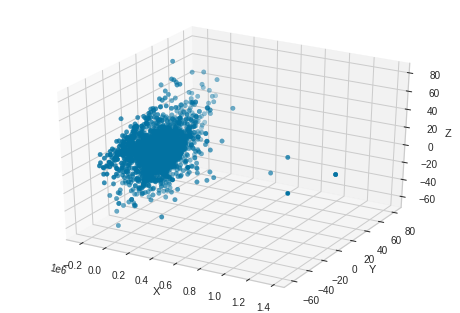

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_ = genre_data.select_dtypes(np.number)
pca.fit(X_)
X3d=pca.transform(X_)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("genreData.png")

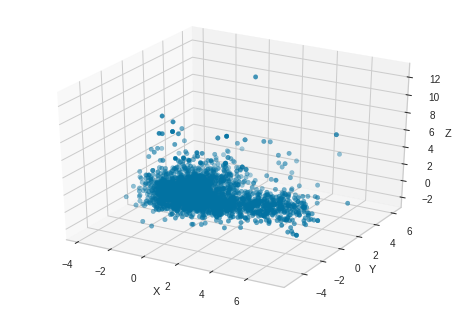

In [ ]:
from sklearn.decomposition import PCA
plot3d = Pipeline([('scaler', StandardScaler()), 
                        ('3d', PCA(n_components=3))])
X_ = genre_data.select_dtypes(np.number)
plot3d.fit(X_)
X3d=plot3d.transform(X_)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("scalerGenreData.png")

In [ ]:
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
k=2
inpData=data
# cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('optics', clustering = OPTICS(min_samples=k, n_jobs=4).fit(X))])
cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('cluster', Birch(n_clusters=None))],verbose=True)
X = inpData.select_dtypes(np.number)
cluster_pipeline.fit(X)
inpData['cluster'] = cluster_pipeline.predict(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_ = inpData.select_dtypes(np.number)
pca.fit(X_)
X3d=pca.transform(X_)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=inpData['cluster'], cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("birch"+str(k)+"Data.png")

In [ ]:
pd.unique(data['cluster'])

array([1, 2, 3, 0], dtype=int32)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
k=len(data)
inpData=data
# cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('optics', clustering = OPTICS(min_samples=k, n_jobs=4).fit(X))])
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', NearestNeighbors(n_neighbors=k, n_jobs=4))],verbose=True)
X = inpData.select_dtypes(np.number)
song_cluster_pipeline.fit(X)
model=song_cluster_pipeline.named_steps['kmeans']
modelScaler=StandardScaler()
modelScaler.fit(X)
X=modelScaler.transform(X)
model.kneighbors(X)
# distances.mean()
# X = inpData.select_dtypes(np.number)
# modelScaler=StandardScaler()
# modelScaler.fit(X)
# X=modelScaler.transform(X)
# model=NearestNeighbors(n_neighbors=k, n_jobs=4)
# model.fit(X)
# distances, indices = model.kneighbors(X)
# distances.mean()

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............ (step 2 of 2) Processing kmeans, total=   0.0s


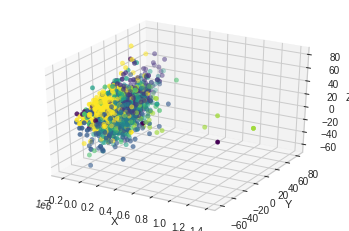

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_ = inpData.select_dtypes(np.number)
pca.fit(X_)
X3d=pca.transform(X_)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=inpData['cluster'], cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("cluster"+str(k)+"GenreData.png")

In [ ]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=10, 
                                   verbose=2, n_jobs=4))],verbose=True)
X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
Initialization complete
Iteration 0, inertia 1922411.1528814123
Iteration 1, inertia 1380999.7175171855
Iteration 2, inertia 1343588.4411892453
Iteration 3, inertia 1331065.1520033057
Iteration 4, inertia 1327126.8285387259
Iteration 5, inertia 1325858.2495918237
Iteration 6, inertia 1324973.435115383
Iteration 7, inertia 1324464.5229628459
Iteration 8, inertia 1324192.0843077481
Iteration 9, inertia 1324013.9052717509
Iteration 10, inertia 1323833.7857756221
Iteration 11, inertia 1323627.6505856907
Iteration 12, inertia 1323361.4119747425
Iteration 13, inertia 1322842.4054891004
Iteration 14, inertia 1321511.556988953
Iteration 15, inertia 1316612.341897864
Iteration 16, inertia 1305315.5807381747
Iteration 17, inertia 1299421.137729703
Iteration 18, inertia 1297802.930631663
Iteration 19, inertia 1297130.0991090466
Iteration 20, inertia 1296821.7142502884
Iteration 21, inertia 1296638.209052061
Iteration 22, inert

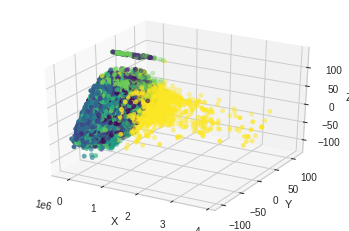

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_ = data.select_dtypes(np.number)
pca.fit(X_)
X3d=pca.transform(X_)
ax = plt.axes(projection='3d')
ax.scatter(X3d[:,0], X3d[:,1], X3d[:,2], c=data['cluster_label'], cmap='viridis');
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig("cluster10data.png")